# Loading libraries

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Train data

In [2]:
train = pd.read_csv("C:/Saurabh/My phone/datasets/Used car data/train-data.csv")
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


We will remove 'Unnamed: 0' column since we already have a index.

In [3]:
train = train.drop(['Unnamed: 0'], axis = 1)

In [4]:
train.describe(include = 'all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017,5983,5983,5977.000000,824,6019.000000
unique,1876,11,NaN,NaN,5,2,4,442,146,372,NaN,540,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,4.78 Lakh,NaN
freq,49,790,NaN,NaN,3205,4299,4929,172,606,235,NaN,6,NaN
mean,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.278735,NaN,9.479468
std,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.808840,NaN,11.187917
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


In [5]:
train.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [6]:
train.shape

(6019, 13)

There are alot of missing values in 'New_price' column so we will remove it and drop other other rows having missing values.

In [7]:
df1 = train.drop(['New_Price'], axis=1)

In [8]:
df1_no_mv = df1.dropna()

In [9]:
df1_no_mv.shape

(5975, 12)

In [10]:
df1_no_mv.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


# Test data

In [11]:
test = pd.read_csv("C:/Saurabh/My phone/datasets/Used car data/test-data.csv")
test = test.drop(['New_Price', 'Unnamed: 0'], axis=1)
test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [12]:
test.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

There are very little missing values which are removable so we will remove it.

In [13]:
df2_no_mv=test.dropna()

In [14]:
df2_no_mv.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


## Data Preprocessing

We will combine both data in list format so that we can perform same operation on both the datat at the same time.

In [15]:
comb = [df1_no_mv, df2_no_mv]

1. Splitting the alphanumeric values into just number.
2. Splitting the Name of car into the main brand and model.

In [16]:
for a in comb:
    a[['mileage','unit_1']] = a['Mileage'].str.split(" ", expand = True)
    a[['engine', 'unit_2']] = a['Engine'].str.split(" ", expand = True)
    a[['power', 'unit_3']] = a['Power'].str.split(" ", expand=True)
    a[['brand', 'model']] = a['Name'].str.split(" ", n=1, expand=True)

C:\Users\Saurabh\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


After splitting the alphanumeric values into numbers we found that ther are some cells which are supposed to be null values but are filled with 'null' in string format, which makes them not null so we will be replacing them with 'average value of power'.

In [17]:
for a in comb:
    a['power'] = a['power'].replace(to_replace='null', value=0)
    a['power'] = a['power'].astype(float)
    a['power'] = a['power'].replace(to_replace=0, value=a['power'].mean())

<ipython-input-17-1e2aa22e95ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['power'] = a['power'].replace(to_replace='null', value=0)
<ipython-input-17-1e2aa22e95ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['power'] = a['power'].astype(float)
<ipython-input-17-1e2aa22e95ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

Since these numbers are stil in string format since they have been just splitted from string format, we will have to convert them into rspective float or int type.

In [18]:
for a in comb:
    a['power'] = a['power'].astype(float)
    a['engine'] = a['engine'].astype(int)
    a['mileage'] = a['mileage'].astype(float)

<ipython-input-18-64dd93e58ce4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['power'] = a['power'].astype(float)
<ipython-input-18-64dd93e58ce4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['engine'] = a['engine'].astype(int)
<ipython-input-18-64dd93e58ce4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

Dropping the unnecessary columns.

In [19]:
train_data = df1_no_mv.drop(['Power', 'unit_3', 'Engine', 'unit_2', 'Mileage', 'unit_1',\
                        'Name', 'model'], axis = 1)

In [20]:
test_data = df2_no_mv.drop(['Power', 'unit_3', 'Engine', 'unit_2', 'Mileage', 'unit_1',\
                        'Name', 'model'], axis = 1)

Keeping the columns in an order so that it will be easy to see.

In [21]:
train_data.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'mileage', 'engine', 'power', 'brand'],
      dtype='object')

In [22]:
train_data = train_data[['Price', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',\
                         'Transmission','Owner_Type', 'Seats', 'mileage', 'engine', 'power', 'brand']]

In [23]:
test_data = test_data[['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',\
                         'Transmission','Owner_Type', 'Seats', 'mileage', 'engine', 'power', 'brand']]

In [24]:
train_data.head()

,Price,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,mileage,engine,power,brand
0,1.75,Mumbai,2010,72000,CNG,Manual,First,5.0,26.60,998,58.16,Maruti
1,12.50,Pune,2015,41000,Diesel,Manual,First,5.0,19.67,1582,126.20,Hyundai
2,4.50,Chennai,2011,46000,Petrol,Manual,First,5.0,18.20,1199,88.70,Honda
3,6.00,Chennai,2012,87000,Diesel,Manual,First,7.0,20.77,1248,88.76,Maruti
4,17.74,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,15.20,1968,140.80,Audi


In [25]:
test_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,mileage,engine,power,brand
0,Delhi,2014,40929,CNG,Manual,First,4.0,32.26,998,58.200000,Maruti
1,Coimbatore,2013,54493,Petrol,Manual,Second,5.0,24.70,796,47.300000,Maruti
2,Mumbai,2017,34000,Diesel,Manual,First,7.0,13.68,2393,147.800000,Toyota
3,Hyderabad,2012,139000,Diesel,Manual,First,5.0,23.59,1364,108.412563,Toyota
4,Mumbai,2014,29000,Petrol,Manual,First,5.0,18.50,1197,82.850000,Hyundai


There are some brands in train data which are not there in test data and vice versa so we will only keep the common ones so that model dont get confused when introduced to new values.

In [26]:
print(len(train_data['brand'].unique()))
print(len(test_data['brand'].unique()))

31
29


In [27]:
a=train_data['brand'].unique()
a.sort()
a

array(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Isuzu',
       'Jaguar', 'Jeep', 'Lamborghini', 'Land', 'Mahindra', 'Maruti',
       'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Porsche',
       'Renault', 'Skoda', 'Smart', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [28]:
b=test_data['brand'].unique()
b.sort()
b

array(['Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'ISUZU', 'Isuzu', 'Jaguar',
       'Jeep', 'Land', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini',
       'Mitsubishi', 'Nissan', 'OpelCorsa', 'Porsche', 'Renault', 'Skoda',
       'Tata', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

These are the uncommon brands in train and test data respectively which we will be removing.

In [29]:
train_list = ['Ambassador', 'Force', 'Lamborghini', 'Smart']
test_list = ['Hindustan', 'OpelCorsa']

In [30]:
train_data[train_data['brand']=='Ambassador']

,Price,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,mileage,engine,power,brand
1221,1.35,Chennai,2003,80000,Diesel,Manual,Third,5.0,12.8,1489,35.5,Ambassador


In [31]:
train_data[train_data['brand']=='Force']

,Price,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,mileage,engine,power,brand
4997,12.0,Chennai,2014,50000,Diesel,Manual,First,7.0,17.0,2200,139.01,Force
5182,8.0,Kolkata,2014,41000,Diesel,Manual,First,7.0,17.0,2149,139.07,Force
5206,8.0,Kolkata,2014,41000,Diesel,Manual,First,7.0,17.0,2200,139.01,Force


In [32]:
train_data[train_data['brand']=='Lamborghini']

,Price,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,mileage,engine,power,brand
5781,120.0,Delhi,2011,6500,Petrol,Automatic,Third,2.0,6.4,5204,560.0,Lamborghini


In [33]:
train_data[train_data['brand']=='Smart']

,Price,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,mileage,engine,power,brand
915,3.0,Pune,2008,103000,Diesel,Automatic,Second,2.0,0.0,799,111.324171,Smart


In [34]:
train_data = train_data.drop([915, 1221, 4997, 5182, 5206, 5781], axis = 0)

In [35]:
test_data[test_data['brand']=='Hindustan']

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,mileage,engine,power,brand
197,Pune,1996,65000,Diesel,Manual,Second,5.0,14.1,1995,108.412563,Hindustan


In [36]:
test_data[test_data['brand']=='OpelCorsa']

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,mileage,engine,power,brand
1048,Hyderabad,2005,50000,Petrol,Manual,Second,5.0,14.2,1389,88.0,OpelCorsa


In [37]:
test_data = test_data.drop([197, 1048], axis = 0)

In [38]:
print(train_data.shape)
print(test_data.shape)

(5969, 12)
(1221, 11)


Checking the mean price of a car from a perticular brand so that we can divide the mean price range of cars in 5 groups.

In [39]:
c = train_data.groupby('brand').Price.agg(['mean', 'count']).sort_values(by='mean')
c

,mean,count
brand,,
Chevrolet,3.044463,121
Datsun,3.049231,13
Fiat,3.340800,25
Tata,3.562849,186
Maruti,4.538730,1197
Nissan,4.738352,91
Volkswagen,5.307270,315
Hyundai,5.363673,1100
Honda,5.430948,601


In [40]:
mean_price = pd.DataFrame(c['mean'])
mean_price['mean']

brand
Chevrolet         3.044463
Datsun            3.049231
Fiat              3.340800
Tata              3.562849
Maruti            4.538730
Nissan            4.738352
Volkswagen        5.307270
Hyundai           5.363673
Honda             5.430948
Renault           5.799034
Ford              6.900067
Skoda             7.559075
Mahindra          8.027638
Mitsubishi       11.058889
Toyota           11.598264
ISUZU            12.045000
Jeep             18.718667
Volvo            18.802857
Isuzu            20.000000
BMW              25.439618
Audi             25.537712
Mercedes-Benz    26.809874
Mini             26.896923
Jaguar           37.632250
Land             39.861053
Porsche          48.348333
Bentley          59.000000
Name: mean, dtype: float64

In [41]:
pd.cut(mean_price['mean'], 5)

brand
Chevrolet         (2.989, 14.236]
Datsun            (2.989, 14.236]
Fiat              (2.989, 14.236]
Tata              (2.989, 14.236]
Maruti            (2.989, 14.236]
Nissan            (2.989, 14.236]
Volkswagen        (2.989, 14.236]
Hyundai           (2.989, 14.236]
Honda             (2.989, 14.236]
Renault           (2.989, 14.236]
Ford              (2.989, 14.236]
Skoda             (2.989, 14.236]
Mahindra          (2.989, 14.236]
Mitsubishi        (2.989, 14.236]
Toyota            (2.989, 14.236]
ISUZU             (2.989, 14.236]
Jeep             (14.236, 25.427]
Volvo            (14.236, 25.427]
Isuzu            (14.236, 25.427]
BMW              (25.427, 36.618]
Audi             (25.427, 36.618]
Mercedes-Benz    (25.427, 36.618]
Mini             (25.427, 36.618]
Jaguar           (36.618, 47.809]
Land             (36.618, 47.809]
Porsche            (47.809, 59.0]
Bentley            (47.809, 59.0]
Name: mean, dtype: category
Categories (5, interval[float64]): [(2.989, 14.2

So we will be making 5 groups of brands of cars accoring to the average price range a car has of a perticular brand as given below.

In [42]:
cheap=('Chevrolet','Datsun','Fiat','Tata','Maruti','Nissan','Volkswagen','Hyundai','Honda,Renault'\
       ,'Ford','Skoda','Mahindra','Mitsubishi','Toyota','ISUZU')
medium = ('Jeep','Volvo', 'Isuzu')
decent = ('BMW', 'Audi', 'Mercedes-Benz', 'Mini')
expensive = ('Jaguar', 'Land')
luxury = ('Porsche', 'Bentley')

#####  Data mampping

Combining the 2 datas in a list so we can perform same operation on both the data the same timme.

In [43]:
d = [train_data, test_data]

In [44]:
for a in d:
    a['brand_map'] = a['brand'].map({'Chevrolet':0,'Datsun':0,'Fiat':0,'Tata':0,'Maruti':0,\
                                     'Nissan':0,'Volkswagen':0,'Hyundai':0,'Honda':0,'Renault':0,\
                                     'Ford':0,'Skoda':0,'Mahindra':0,'Mitsubishi':0,'Toyota':0,\
                                     'ISUZU':0,\
                                    'Jeep':1,'Volvo':1, 'Isuzu':1,\
                                    'BMW':2, 'Audi':2, 'Mercedes-Benz':2, 'Mini':2,\
                                    'Jaguar':3, 'Land':3,\
                                    'Porsche':4, 'Bentley':4})

In [45]:
train_data.head()

,Price,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,mileage,engine,power,brand,brand_map
0,1.75,Mumbai,2010,72000,CNG,Manual,First,5.0,26.60,998,58.16,Maruti,0
1,12.50,Pune,2015,41000,Diesel,Manual,First,5.0,19.67,1582,126.20,Hyundai,0
2,4.50,Chennai,2011,46000,Petrol,Manual,First,5.0,18.20,1199,88.70,Honda,0
3,6.00,Chennai,2012,87000,Diesel,Manual,First,7.0,20.77,1248,88.76,Maruti,0
4,17.74,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,15.20,1968,140.80,Audi,2


In [46]:
print(train_data['Fuel_Type'].unique())
print(train_data['Transmission'].unique())
print(train_data['Owner_Type'].unique())

['CNG' 'Diesel' 'Petrol' 'LPG']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [47]:
train_data['fuel_t'] = train_data['Fuel_Type'].map({'CNG':0, 'Diesel':1, 'Petrol':2 ,'LPG':3})
train_data['transmission'] = train_data['Transmission'].map({'Manual':0, 'Automatic':1})
train_data['owner_type'] = train_data['Owner_Type'].map({'First':0, 'Second':1, \
                                                         'Fourth & Above':2, 'Third':3})

In [48]:
test_data['fuel_t'] = test_data['Fuel_Type'].map({'CNG':0, 'Diesel':1, 'Petrol':2 ,'LPG':3})
test_data['transmission'] = test_data['Transmission'].map({'Manual':0, 'Automatic':1})
test_data['owner_type'] = test_data['Owner_Type'].map({'First':0, 'Second':1, \
                                                         'Fourth & Above':2, 'Third':3})

In [49]:
train_data['location_encoder']=train_data['Location'].map({'Mumbai':0, 'Pune':1, 'Chennai':2,\
                                                           'Coimbatore':3, 'Hyderabad':4, 'Jaipur':5,\
                                                           'Kochi':6, 'Kolkata':7, 'Delhi':8,\
                                                           'Bangalore':9, 'Ahmedabad':10})

In [50]:
test_data['location_encoder']=test_data['Location'].map({'Mumbai':0, 'Pune':1, 'Chennai':2,\
                                                           'Coimbatore':3, 'Hyderabad':4, 'Jaipur':5,\
                                                           'Kochi':6, 'Kolkata':7, 'Delhi':8,\
                                                           'Bangalore':9, 'Ahmedabad':10})

In [51]:
train_data.head()

,Price,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,mileage,engine,power,brand,brand_map,fuel_t,transmission,owner_type,location_encoder
0,1.75,Mumbai,2010,72000,CNG,Manual,First,5.0,26.60,998,58.16,Maruti,0,0,0,0,0
1,12.50,Pune,2015,41000,Diesel,Manual,First,5.0,19.67,1582,126.20,Hyundai,0,1,0,0,1
2,4.50,Chennai,2011,46000,Petrol,Manual,First,5.0,18.20,1199,88.70,Honda,0,2,0,0,2
3,6.00,Chennai,2012,87000,Diesel,Manual,First,7.0,20.77,1248,88.76,Maruti,0,1,0,0,2
4,17.74,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,15.20,1968,140.80,Audi,2,1,1,1,3


Only keeping the columns which are usefull.

In [52]:
train_data.columns

Index(['Price', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'mileage', 'engine', 'power',
       'brand', 'brand_map', 'fuel_t', 'transmission', 'owner_type',
       'location_encoder'],
      dtype='object')

In [53]:
train_df=train_data[['Price', 'Year', 'Kilometers_Driven', 'Seats', 'mileage', 'engine', 'power',\
       'fuel_t', 'transmission', 'owner_type', 'brand_map',\
       'location_encoder']]

In [54]:
test_df=test_data[['Year', 'Kilometers_Driven', 'Seats', 'mileage', 'engine', 'power',\
       'fuel_t', 'transmission', 'owner_type', 'brand_map',\
       'location_encoder']]

In [55]:
train_df.head()

,Price,Year,Kilometers_Driven,Seats,mileage,engine,power,fuel_t,transmission,owner_type,brand_map,location_encoder
0,1.75,2010,72000,5.0,26.60,998,58.16,0,0,0,0,0
1,12.50,2015,41000,5.0,19.67,1582,126.20,1,0,0,0,1
2,4.50,2011,46000,5.0,18.20,1199,88.70,2,0,0,0,2
3,6.00,2012,87000,7.0,20.77,1248,88.76,1,0,0,0,2
4,17.74,2013,40670,5.0,15.20,1968,140.80,1,1,1,2,3


In [56]:
test_df.head()

,Year,Kilometers_Driven,Seats,mileage,engine,power,fuel_t,transmission,owner_type,brand_map,location_encoder
0,2014,40929,4.0,32.26,998,58.200000,0,0,0,0,8
1,2013,54493,5.0,24.70,796,47.300000,2,0,1,0,3
2,2017,34000,7.0,13.68,2393,147.800000,1,0,0,0,0
3,2012,139000,5.0,23.59,1364,108.412563,1,0,0,0,4
4,2014,29000,5.0,18.50,1197,82.850000,2,0,0,0,0


Checkig the correlation between features.

<AxesSubplot:>

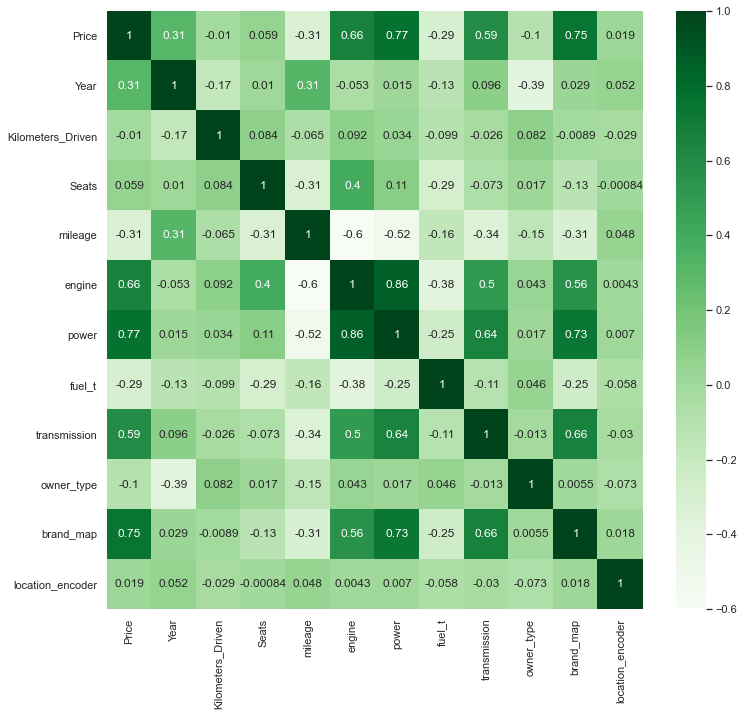

In [182]:
fig = plt.figure(figsize=[12,11])
sns.heatmap(train_df.corr(), annot= True, cmap="Greens")

##### Main variables

In [58]:
x = train_df.drop(['Price'], axis=1)
y = train_df['Price']

## Train test split

In [59]:
from sklearn.model_selection import train_test_split

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Regressor Model building

### Linear regression

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
reg = LinearRegression()

In [99]:
reg.fit(x_train, y_train)

LinearRegression()

In [100]:
reg.score(x_train, y_train)

0.7459836126106896

In [101]:
reg.score(x_test, y_test)

0.7925418100806517

In [102]:
y_pred = reg.predict(x_test)

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

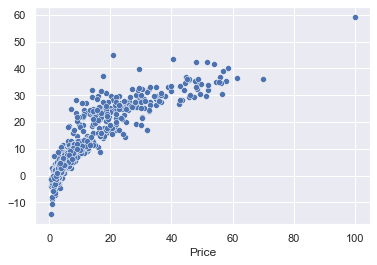

In [176]:
sns.scatterplot(y_test, y_pred)

We'll need more accuracy than this so we will try more models.

### Decision tree

In [103]:
from sklearn.tree import DecisionTreeRegressor

In [104]:
dec = DecisionTreeRegressor()

In [105]:
dec.fit(x_train, y_train)

DecisionTreeRegressor()

In [106]:
dec.score(x_train, y_train)

0.9999962931212466

In [107]:
dec.score(x_test, y_test)

0.7715178393070444

In [108]:
y2_pred = dec.predict(x_test)

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

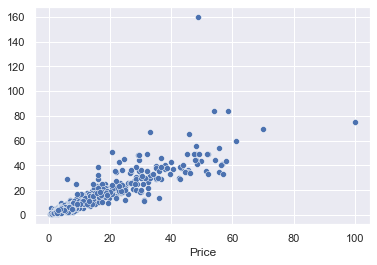

In [109]:
sns.scatterplot(y_test, y2_pred)

This is giving better accuracy but we need to tweak parameters to see if we can increase the accuracy.

### Random forest

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
rnd = RandomForestRegressor()

In [112]:
rnd.fit(x_train, y_train)

RandomForestRegressor()

In [113]:
rnd.score(x_train, y_train)

0.9830039376633577

In [114]:
rnd.score(x_test, y_test)

0.9199896559559279

In [115]:
y3_pred = rnd.predict(x_test)

C:\Users\Saurabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

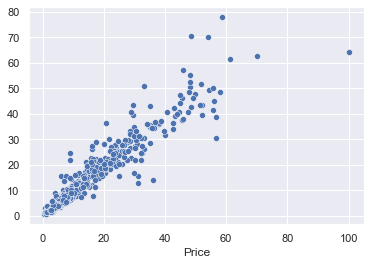

In [116]:
sns.scatterplot(y_test, y3_pred)

This is giving better accuracy but we need to tweak parameters to see if we can increase the accuracy.

### MSE
##### These are the Mean Squared errors of each model.

In [117]:
from sklearn.metrics import mean_squared_error

Linear regression

In [118]:
mean_squared_error(y_test, y_pred)

23.887353809923972

Decision tree

In [119]:
mean_squared_error(y_test, y2_pred)

26.30811641541039

Random forest

In [120]:
mean_squared_error(y_test, y3_pred)

9.212629288713586

### r2_score
##### These are the r squared score of each model.

In [121]:
from sklearn.metrics import r2_score

Linear regression

In [122]:
r2_score(y_test, y_pred)

0.7925418100806517

Decision tree

In [123]:
r2_score(y_test, y2_pred)

0.7715178393070444

Random forest

In [124]:
r2_score(y_test, y3_pred)

0.9199896559559279

### Grid search cv

To see what combinatioin of parameters would give us better results we use GridSearchSCV(). 

In [125]:
from sklearn.model_selection import GridSearchCV

#### Decision tree

In [190]:
dec_params={'criterion' : ("mse", "mae"),'min_samples_split': [2,5,10],\
            'max_depth':range(2,22,2)}

In [191]:
clf_dec = GridSearchCV(DecisionTreeRegressor(), dec_params, cv=5)

In [192]:
clf_dec.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_depth': range(2, 22, 2),
                         'min_samples_split': [2, 5, 10]})

In [193]:
clf_dec.best_score_

0.8647311552535472

In [194]:
clf_dec.best_params_

{'criterion': 'mae', 'max_depth': 8, 'min_samples_split': 10}

In [195]:
dec_alt = DecisionTreeRegressor(criterion= 'mse', max_depth= 8, min_samples_split= 10)

In [196]:
dec_alt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_split=10)

In [245]:
dec_alt.score(x_train, y_train)

0.9453346044021081

In [197]:
dec_alt.score(x_test, y_test)

0.8471355512086534

As we can see accurcy for train data is different than test data since the model is trained on train data it tend to overfit train data but gives actual accuracy with test data.

In [198]:
y_dec_alt_pred = dec_alt.predict(x_test)

In [199]:
mean_squared_error(y_test, y_dec_alt_pred)

17.601267873095175

#### Random forest

In [200]:
rnd_params = {'criterion' : ("mse", "mae"),'min_samples_split': [2,5,10], 'n_estimators':[100,200]}

In [201]:
clf_rnd = GridSearchCV(RandomForestRegressor(), rnd_params, cv=5)

In [202]:
clf_rnd.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]})

In [203]:
clf_rnd.best_score_

0.9005735605949727

In [204]:
clf_rnd.best_params_

{'criterion': 'mae', 'min_samples_split': 2, 'n_estimators': 100}

In [205]:
rnd_alt = RandomForestRegressor(criterion= 'mae', min_samples_split= 2, n_estimators= 100,\
                                max_depth=2)
rnd1_alt = RandomForestRegressor(criterion= 'mae', min_samples_split= 2, n_estimators= 100,\
                                max_depth=4)
rnd2_alt = RandomForestRegressor(criterion= 'mae', min_samples_split= 2, n_estimators= 100,\
                                max_depth=6)
rnd3_alt = RandomForestRegressor(criterion= 'mae', min_samples_split= 2, n_estimators= 100,\
                                max_depth=8)
rnd4_alt = RandomForestRegressor(criterion= 'mae', min_samples_split= 2, n_estimators= 100,\
                                max_depth=10)
rnd5_alt = RandomForestRegressor(criterion= 'mae', min_samples_split= 2, n_estimators= 100,\
                                max_depth=12)
rnd6_alt = RandomForestRegressor(criterion= 'mae', min_samples_split= 2, n_estimators= 100,\
                                max_depth=14)
rnd7_alt = RandomForestRegressor(criterion= 'mae', min_samples_split= 2, n_estimators= 100,\
                                max_depth=16)
rnd8_alt = RandomForestRegressor(criterion= 'mae', min_samples_split= 2, n_estimators= 100,\
                                max_depth=18)
rnd9_alt = RandomForestRegressor(criterion= 'mae', min_samples_split= 2, n_estimators= 100,\
                                max_depth=20)

In [206]:
rnd_alt.fit(x_train, y_train)

RandomForestRegressor(criterion='mae', max_depth=2)

In [207]:
rnd1_alt.fit(x_train, y_train)
rnd2_alt.fit(x_train, y_train)
rnd3_alt.fit(x_train, y_train)
rnd4_alt.fit(x_train, y_train)
rnd5_alt.fit(x_train, y_train)
rnd6_alt.fit(x_train, y_train)
rnd7_alt.fit(x_train, y_train)
rnd8_alt.fit(x_train, y_train)
rnd9_alt.fit(x_train, y_train)

RandomForestRegressor(criterion='mae', max_depth=20)

In [215]:
print('Train dataset')
print(" ")
print("Score with depth 2= "+ str(rnd_alt.score(x_train, y_train)))
print("Score with depth 4= "+ str(rnd1_alt.score(x_train, y_train)))
print("Score with depth 6= "+ str(rnd2_alt.score(x_train, y_train)))
print("Score with depth 8= "+ str(rnd3_alt.score(x_train, y_train)))
print("Score with depth 10= "+ str(rnd4_alt.score(x_train, y_train)))
print("Score with depth 12= "+ str(rnd5_alt.score(x_train, y_train)))
print("Score with depth 14= "+ str(rnd6_alt.score(x_train, y_train)))
print("Score with depth 16= "+ str(rnd7_alt.score(x_train, y_train)))
print("Score with depth 18= "+ str(rnd8_alt.score(x_train, y_train)))
print("Score with depth 20= "+ str(rnd9_alt.score(x_train, y_train)))

Train dataset
 
Score with depth 2= 0.6218615252977231
Score with depth 4= 0.8538541618314005
Score with depth 6= 0.9201368664688528
Score with depth 8= 0.9543876688906506
Score with depth 10= 0.9690049877097365
Score with depth 12= 0.9782788755525481
Score with depth 14= 0.9829381721364275
Score with depth 16= 0.9833472921655746
Score with depth 18= 0.9839464614724429
Score with depth 20= 0.9858151003569556


In [216]:
print("Test dataset")
print(" ")
print("Score with depth 2= "+ str(rnd_alt.score(x_test, y_test)))
print("Score with depth 4= "+ str(rnd1_alt.score(x_test, y_test)))
print("Score with depth 6= "+ str(rnd2_alt.score(x_test, y_test)))
print("Score with depth 8= "+ str(rnd3_alt.score(x_test, y_test)))
print("Score with depth 10= "+ str(rnd4_alt.score(x_test, y_test)))
print("Score with depth 12= "+ str(rnd5_alt.score(x_test, y_test)))
print("Score with depth 14= "+ str(rnd6_alt.score(x_test, y_test)))
print("Score with depth 16= "+ str(rnd7_alt.score(x_test, y_test)))
print("Score with depth 18= "+ str(rnd8_alt.score(x_test, y_test)))
print("Score with depth 20= "+ str(rnd9_alt.score(x_test, y_test)))

Test dataset
 
Score with depth 2= 0.6713763806152511
Score with depth 4= 0.8484819682658649
Score with depth 6= 0.8970643264424365
Score with depth 8= 0.9140965236187771
Score with depth 10= 0.9214278329627063
Score with depth 12= 0.9215228204474334
Score with depth 14= 0.9175005845458917
Score with depth 16= 0.9201999957130559
Score with depth 18= 0.9265680113976512
Score with depth 20= 0.9219636453177003


As we can see accurcy for train data is different than test data since the model is trained on train data it tend to overfit train data but gives actual accuracy with test data.

So this shows puttinng max_depth=18 in model will give better results. That means we will use 'rnd8_alt' model.

In [217]:
y_rnd_alt_pred = rnd8_alt.predict(x_test)

In [218]:
mean_squared_error(y_test, y_rnd_alt_pred)

8.455177852426718

In [239]:
rnd8_alt_params = dict({'criterion': 'mae', 'max_depth': 18, 'n_estimators': 100})

In [240]:
rnd8_alt_score = rnd8_alt.score(x_test, y_test)

#### Linear regression

In [219]:
lin_params = {'n_jobs':[2,10,20]}

In [220]:
clf_lin = GridSearchCV(LinearRegression(), lin_params, cv= 5)

In [221]:
clf_lin.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'n_jobs': [2, 10, 20]})

In [222]:
clf_lin.best_score_

0.7201747516845269

In [223]:
clf_lin.best_params_

{'n_jobs': 2}

In [224]:
lin_alt = LinearRegression(n_jobs= 2)

In [225]:
lin_alt.fit(x_train, y_train)

LinearRegression(n_jobs=2)

In [226]:
lin_alt.score(x_train, y_train)

0.7459836126106896

In [227]:
lin_alt.score(x_test, y_test)

0.7925418100806517

As we can see accurcy for train data is different than test data since the model is trained on train data it tend to overfit train data but gives actual accuracy with test data.

In [228]:
y_lin_alt_pred = lin_alt.predict(x_test)

In [229]:
mean_squared_error(y_test, y_lin_alt_pred)

23.887353809923972

### Comparison of models

Comparing accuracy of different models and selecting most accurate model.

In [241]:
comp_mod = pd.DataFrame()
comp_mod['Model_name']= ['Linear_model', 'Decision_tree', 'Random_forest']
comp_mod['Best_parameters']= [clf_lin.best_params_, clf_dec.best_params_, rnd8_alt_params]
comp_mod['Best_score']= [clf_lin.best_score_, clf_dec.best_score_, rnd8_alt_score]

In [242]:
comp_mod

,Model_name,Best_parameters,Best_score
0,Linear_model,{'n_jobs': 2},0.720175
1,Decision_tree,"{'criterion': 'mae', 'max_depth': 8, 'min_samp...",0.864731
2,Random_forest,"{'criterion': 'mae', 'max_depth': 18, 'n_estim...",0.926568


So as we can see best model for this data would be the Randodm forest one with some parameter tunings as shown in above table.

In [244]:
e = pd.DataFrame()
e['Features'] = x_train.columns
e['Weights'] = rnd8_alt.feature_importances_
e

,Features,Weights
0,Year,0.209191
1,Kilometers_Driven,0.077194
2,Seats,0.012687
3,mileage,0.052627
4,engine,0.081227
5,power,0.215554
6,fuel_t,0.005297
7,transmission,0.005077
8,owner_type,0.007618
9,brand_map,0.290344


Here are the coefficients of respective features.